In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import "/content/drive/My Drive/thailand_real_estate_2023_clean.csv"
df = pd.read_csv("/content/drive/My Drive/thailand_real_estate_2023_clean.csv")

# Print object type, shape, and head
print("df type:", type(df))
print("df shape:", df.shape)
df.head()

df type: <class 'pandas.core.frame.DataFrame'>
df shape: (24271, 8)


,project_id,name_en,propertytype_name_en,developer_name_en,latitude,longitude,province_name_en,price_min_usd
0,project_15493,Silanta 8 Life,Townhome,"Prevision Realestate Co.,Ltd.",13.066877,101.007403,Chon Buri,43089.43
1,project_16938,Baanbaan Vibhavadi 20,Detached House,"RISING PLUS DEVELOPMENT CO., LTD.",13.804232,100.563121,Bangkok,704607.05
2,project_11503,The Metro Rama 9 - Krungthep Kreetha,Townhome,"PROPERTY PERFECT PUB CO., LTD.",13.761310,100.708344,Bangkok,102710.03
3,project_12358,The Plant Citi Ladprao 71,Townhome,"Preuksa Real Estate Co.,Ltd.",13.817442,100.617251,Bangkok,81029.81
4,project_2871,Baan PS Home 2,Detached House,Unknown Developer,16.495429,102.832852,Khon Kaen,108130.08


In [4]:
df["propertytype_name_en"].value_counts()

,count
propertytype_name_en,
Detached House,9024
Townhome,6578
Condo,4837
Twin house,1999
Commercial,1488
Home office,287
Apartment,18
Hotel,15
Land,8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24271 entries, 0 to 24270
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   project_id            24271 non-null  object 
 1   name_en               24267 non-null  object 
 2   propertytype_name_en  24271 non-null  object 
 3   developer_name_en     24271 non-null  object 
 4   latitude              24271 non-null  float64
 5   longitude             24263 non-null  float64
 6   province_name_en      24255 non-null  object 
 7   price_min_usd         24203 non-null  float64
dtypes: float64(3), object(5)
memory usage: 1.5+ MB


In [6]:
# Filter the DataFrame for rows where 'propertytype_name_en' is 'Condo'
condo_df = df[df['propertytype_name_en'] == 'Condo']
condo_df.head()

,project_id,name_en,propertytype_name_en,developer_name_en,latitude,longitude,province_name_en,price_min_usd
10,project_3377,The Kith Lite Bangkadi-Tiwanon,Condo,"SENA DEVELOPMENT PUB CO., LTD.",13.987735,100.552223,Pathum Thani,29810.30
18,project_4169,Condo Baan Chalermprakiat,Condo,Unknown Developer,13.845321,100.478997,Nonthaburi,11355.01
19,604b1d0aa8b9ee0013d7ec31,Ping Plus Condominium,Condo,"Theppayom Group Co., Ltd.",18.772959,98.992702,Chiang Mai,43089.43
21,project_5785,Aue Amornsuk (Suan Luang),Condo,Unknown Developer,13.745206,100.599978,Bangkok,14905.15
29,project_1781,Pupha Jun Hill Khao Yai,Condo,Unknown Developer,14.587302,101.239870,Nakhon Ratchasima,0.00


In [7]:
# Print object type, shape, and head
print("condo_df type:", type(condo_df))
print("condo_df shape:", condo_df.shape)
condo_df.head()

condo_df type: <class 'pandas.core.frame.DataFrame'>
condo_df shape: (4837, 8)


,project_id,name_en,propertytype_name_en,developer_name_en,latitude,longitude,province_name_en,price_min_usd
10,project_3377,The Kith Lite Bangkadi-Tiwanon,Condo,"SENA DEVELOPMENT PUB CO., LTD.",13.987735,100.552223,Pathum Thani,29810.30
18,project_4169,Condo Baan Chalermprakiat,Condo,Unknown Developer,13.845321,100.478997,Nonthaburi,11355.01
19,604b1d0aa8b9ee0013d7ec31,Ping Plus Condominium,Condo,"Theppayom Group Co., Ltd.",18.772959,98.992702,Chiang Mai,43089.43
21,project_5785,Aue Amornsuk (Suan Luang),Condo,Unknown Developer,13.745206,100.599978,Bangkok,14905.15
29,project_1781,Pupha Jun Hill Khao Yai,Condo,Unknown Developer,14.587302,101.239870,Nakhon Ratchasima,0.00


In [8]:
# Filter out rows where 'price_min_usd' is 0.00
condo_df = condo_df[condo_df['price_min_usd'] != 0.00]


In [9]:
# Drop "project_id" from df3
condo_df.drop(columns=["project_id"], inplace=True)

condo_df.head()

,name_en,propertytype_name_en,developer_name_en,latitude,longitude,province_name_en,price_min_usd
10,The Kith Lite Bangkadi-Tiwanon,Condo,"SENA DEVELOPMENT PUB CO., LTD.",13.987735,100.552223,Pathum Thani,29810.30
18,Condo Baan Chalermprakiat,Condo,Unknown Developer,13.845321,100.478997,Nonthaburi,11355.01
19,Ping Plus Condominium,Condo,"Theppayom Group Co., Ltd.",18.772959,98.992702,Chiang Mai,43089.43
21,Aue Amornsuk (Suan Luang),Condo,Unknown Developer,13.745206,100.599978,Bangkok,14905.15
32,Rama VI Mansion,Condo,Unknown Developer,13.806133,100.514380,Bangkok,20325.20


In [10]:
# Print object type, shape, and head
print("condo_df type:", type(condo_df))
print("condo_df shape:", condo_df.shape)
condo_df.head()

condo_df type: <class 'pandas.core.frame.DataFrame'>
condo_df shape: (4649, 7)


,name_en,propertytype_name_en,developer_name_en,latitude,longitude,province_name_en,price_min_usd
10,The Kith Lite Bangkadi-Tiwanon,Condo,"SENA DEVELOPMENT PUB CO., LTD.",13.987735,100.552223,Pathum Thani,29810.30
18,Condo Baan Chalermprakiat,Condo,Unknown Developer,13.845321,100.478997,Nonthaburi,11355.01
19,Ping Plus Condominium,Condo,"Theppayom Group Co., Ltd.",18.772959,98.992702,Chiang Mai,43089.43
21,Aue Amornsuk (Suan Luang),Condo,Unknown Developer,13.745206,100.599978,Bangkok,14905.15
32,Rama VI Mansion,Condo,Unknown Developer,13.806133,100.514380,Bangkok,20325.20


In [12]:
# Location Data
# Use plotly express to create figure
fig = px.scatter_mapbox(
    condo_df,  # Our DataFrame
    lat="latitude",
    lon="longitude",
    center={"lat": 13.7563, "lon": 100.5018},  # Map will be centered on Bangkok City
    width=600,  # Width of map
    height=600,  # Height of map
    hover_data=["price_min_usd"],  # Display price when hovering mouse over condo
)

# Add mapbox_style to figure layout
fig.update_layout(mapbox_style="open-street-map")

# Show figure
fig.show()

In [13]:
# Which province has the most expensive real estate market?

# Declare variable `mean_price_by_province`
mean_price_by_province = condo_df.groupby("province_name_en")["price_min_usd"].mean().sort_values(ascending=False)

# Print object type, shape, and head
print("mean_price_by_province:", type(mean_price_by_province))
print("mean_price_by_province shape:", mean_price_by_province.shape)
mean_price_by_province.head()


mean_price_by_province: <class 'pandas.core.series.Series'>
mean_price_by_province shape: (45,)


,price_min_usd
province_name_en,
Kanchanaburi,268292.680000
Prachuap Khiri Khan,184860.083933
Phuket,141857.303659
Krabi,134507.680000
Phetchaburi,115476.639600


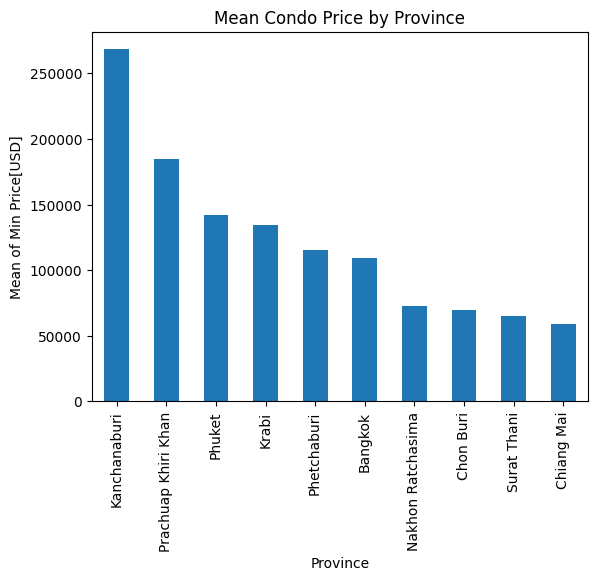

In [14]:
# Create bar chart from top 10 province of `mean_price_by_province` using pandas
mean_price_by_province.head(10).plot(
    kind="bar",
    xlabel="Province",
    ylabel="Mean of Min Price[USD]",
    title="Mean Condo Price by Province"
);

In [15]:
condo_df["province_name_en"].value_counts()

,count
province_name_en,
Bangkok,2479
Chon Buri,581
Nonthaburi,302
Chiang Mai,251
Samut Prakan,210
Phuket,205
Pathum Thani,110
Prachuap Khiri Khan,90
Rayong,87
